In [1]:
import pandas as pd

pd.options.display.max_rows = None
pd.options.display.max_columns = None

datafile = "../data/2022-train-v2.xlsx"
data = pd.read_excel(datafile)

data.isna().sum()

sensor_point5_i_value       0
sensor_point6_i_value       0
sensor_point7_i_value       0
sensor_point8_i_value       0
sensor_point9_i_value       0
sensor_point10_i_value      0
clean_temp                  0
clean_ec                    0
clean_ph4                 286
clean_ph5                 286
clean_ph7                 286
clean_ph8                   0
clean_pressure11            0
clean_pressure12            0
clean_pressure21            0
clean_pressure22            0
clean_pressure23            0
clean_pressure31            0
clean_pressure33            0
clean_pressure41            0
clean_pressure42            0
clean_pressure51            0
clean_pressure52            0
clean_pressure61            0
clean_pressure62            0
clean_pressure71            0
clean_pressure72            0
clean_pressure81            0
clean_pressure82            0
clean_pressure91            0
clean_pressure92            0
clean_pressure101           0
clean_pressure102           0
oven_pa1  

In [2]:
(data.isna().sum(axis=1) == 3).sum()

286

From the above, we have the following fields with NaNs
clean_ph4, clean_ph5, clean_ph7

All have 286 missing cells at the same rows.

Let's see the fields to estimate (outputs).

In [2]:
data.describe()

,sensor_point5_i_value,sensor_point6_i_value,sensor_point7_i_value,sensor_point8_i_value,sensor_point9_i_value,sensor_point10_i_value,clean_temp,clean_ec,clean_ph4,clean_ph5,clean_ph7,clean_ph8,clean_pressure11,clean_pressure12,clean_pressure21,clean_pressure22,clean_pressure23,clean_pressure31,clean_pressure33,clean_pressure41,clean_pressure42,clean_pressure51,clean_pressure52,clean_pressure61,clean_pressure62,clean_pressure71,clean_pressure72,clean_pressure81,clean_pressure82,clean_pressure91,clean_pressure92,clean_pressure101,clean_pressure102,oven_pa1,oven_pa2,oven_pb1,oven_pb2,oven_a1,oven_a2,oven_a3,oven_b1,oven_b2,oven_b3,painting_g1_act_a_air,painting_g1_act_f_air,painting_g1_act_t_air,painting_g1_act_hvv,painting_g1_act_hvc,painting_g2_act_a_air,painting_g2_act_f_air,painting_g2_act_t_air,painting_g2_act_hvv,painting_g2_act_hvc,painting_g3_act_a_air,painting_g3_act_f_air,painting_g3_act_t_air,painting_g3_act_hvv,painting_g3_act_hvc,painting_g4_act_a_air,painting_g4_act_f_air,painting_g4_act_t_air,painting_g4_act_hvv,painting_g4_act_hvc,painting_g5_act_a_air,painting_g5_act_f_air,painting_g5_act_t_air,painting_g5_act_hvv,painting_g5_act_hvc,painting_g6_act_a_air,painting_g6_act_f_air,painting_g6_act_t_air,painting_g6_act_hvv,painting_g6_act_hvc,painting_g7_act_a_air,painting_g7_act_f_air,painting_g7_act_t_air,painting_g7_act_hvv,painting_g7_act_hvc,painting_g8_act_a_air,painting_g8_act_f_air,painting_g8_act_t_air,painting_g8_act_hvv,painting_g8_act_hvc,painting_g9_act_a_air,painting_g9_act_f_air,painting_g9_act_t_air,painting_g9_act_hvv,painting_g9_act_hvc,painting_g10_act_a_air,painting_g10_act_f_air,painting_g10_act_t_air,painting_g10_act_hvv,painting_g10_act_hvc,painting_g11_act_a_air,painting_g11_act_f_air,painting_g11_act_t_air,painting_g11_act_hvv,painting_g11_act_hvc,painting_g12_act_a_air,painting_g12_act_f_air,painting_g12_act_t_air,painting_g12_act_hvv,painting_g12_act_hvc,env_rpi05_hum,env_rpi05_pm1,env_rpi05_pm10,env_rpi05_pm25,env_rpi05_temp,env_rpi07_hum,env_rpi07_pm1,env_rpi07_pm10,env_rpi07_pm25,env_rpi07_temp,env_rpi09_hum,env_rpi09_lux,env_rpi09_pm1,env_rpi09_pm10,env_rpi09_pm25,env_rpi09_temp,env_rpi14_hum,env_rpi14_lux,env_rpi14_pm1,env_rpi14_pm10,env_rpi14_pm25,env_rpi14_temp,env_rpi15_hum,env_rpi15_lux,env_rpi15_pm1,env_rpi15_pm10,env_rpi15_pm25,env_rpi15_temp
count,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,349.000000,349.000000,349.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.00000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.00000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000
mean,79.234646,92.929134,110.897638,80.311811,88.499213,92.125984,47.775591,13.052756,8.920086,7.659742,7.250143,6.996031,746.008472,1393.967402,971.089008,838.239906,727.680583,569.532693,853.137764,787.681465,936.628472,81

<AxesSubplot:>

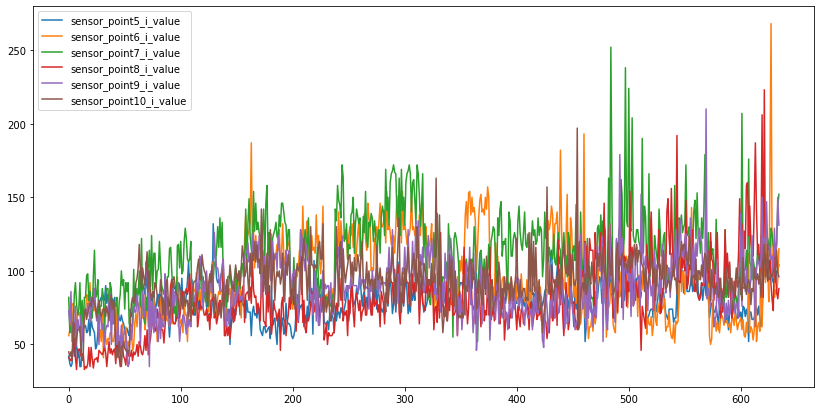

In [3]:
data.iloc[:, :6].plot(figsize=(14,7))

Let's check all fields

In [4]:
# pd.options.display.multi_sparse = False
print(data.columns[6:].tolist())

['clean_temp', 'clean_ec', 'clean_ph4', 'clean_ph5', 'clean_ph7', 'clean_ph8', 'clean_pressure11', 'clean_pressure12', 'clean_pressure21', 'clean_pressure22', 'clean_pressure23', 'clean_pressure31', 'clean_pressure33', 'clean_pressure41', 'clean_pressure42', 'clean_pressure51', 'clean_pressure52', 'clean_pressure61', 'clean_pressure62', 'clean_pressure71', 'clean_pressure72', 'clean_pressure81', 'clean_pressure82', 'clean_pressure91', 'clean_pressure92', 'clean_pressure101', 'clean_pressure102', 'oven_pa1', 'oven_pa2', 'oven_pb1', 'oven_pb2', 'oven_a1', 'oven_a2', 'oven_a3', 'oven_b1', 'oven_b2', 'oven_b3', 'painting_g1_act_a_air', 'painting_g1_act_f_air', 'painting_g1_act_t_air', 'painting_g1_act_hvv', 'painting_g1_act_hvc', 'painting_g2_act_a_air', 'painting_g2_act_f_air', 'painting_g2_act_t_air', 'painting_g2_act_hvv', 'painting_g2_act_hvc', 'painting_g3_act_a_air', 'painting_g3_act_f_air', 'painting_g3_act_t_air', 'painting_g3_act_hvv', 'painting_g3_act_hvc', 'painting_g4_act_a_air

<AxesSubplot:>

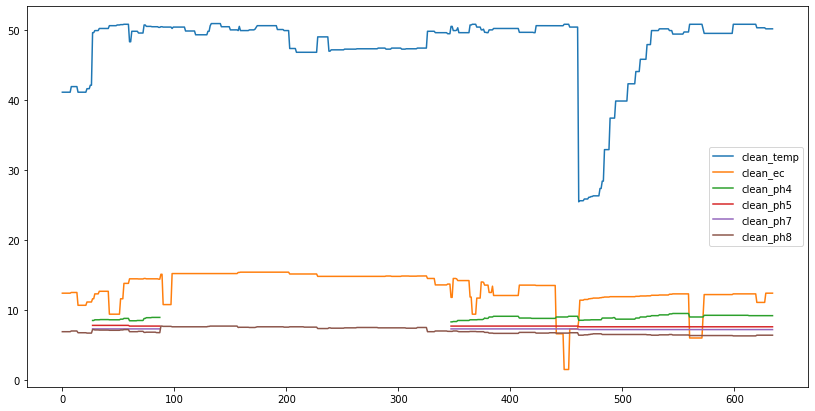

In [5]:
data.loc[:, 'clean_temp':'clean_ph8'].plot(figsize=(14,7))

<AxesSubplot:>

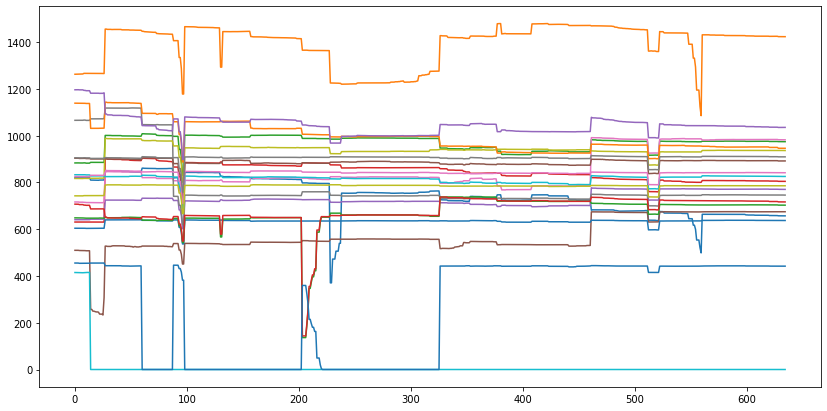

In [6]:
data.loc[:, 'clean_pressure11':'clean_pressure102'].plot(figsize=(14,7), legend=False)

<AxesSubplot:>

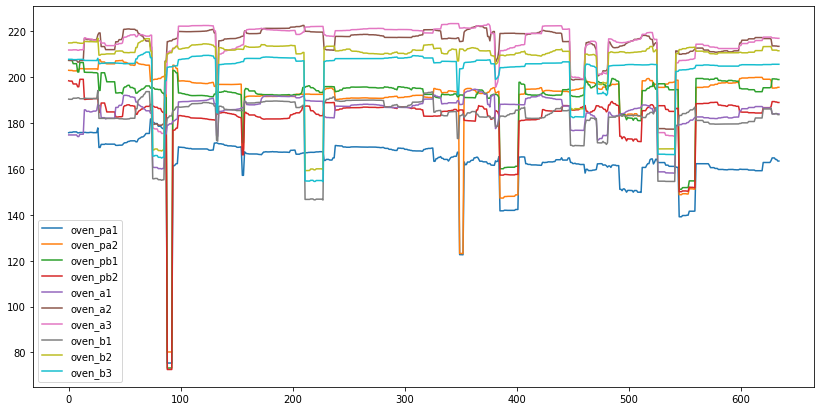

In [7]:
data.loc[:, 'oven_pa1':'oven_b3'].plot(figsize=(14,7))

<AxesSubplot:>

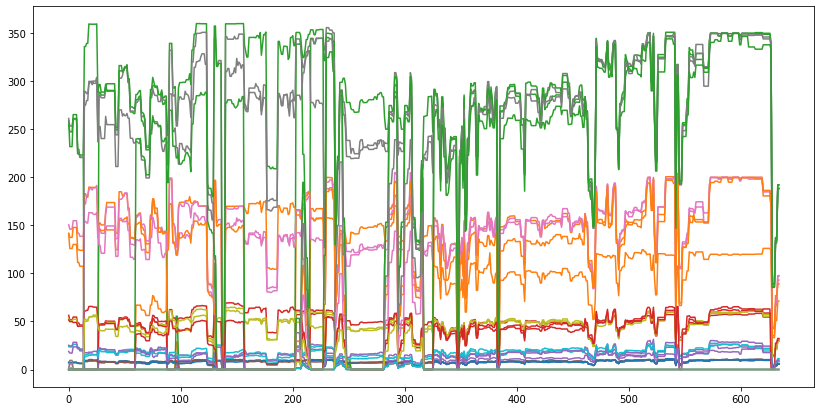

In [8]:
data.loc[:, 'painting_g1_act_a_air':'painting_g6_act_hvc'].plot(figsize=(14,7), legend=False)

<AxesSubplot:>

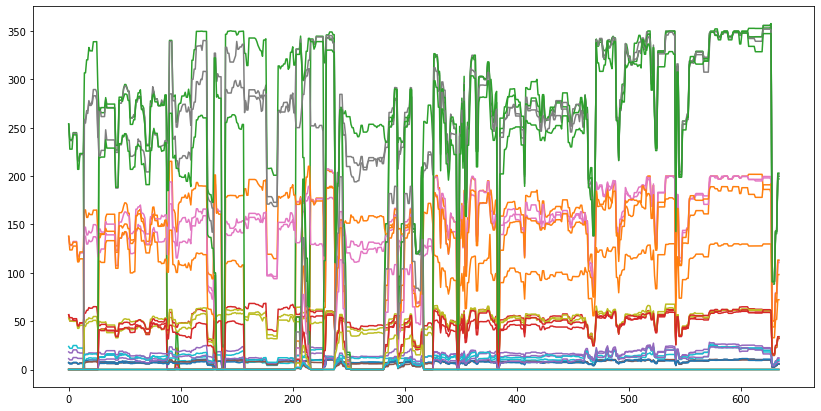

In [9]:
data.loc[:, 'painting_g7_act_a_air':'painting_g12_act_hvc'].plot(figsize=(14,7), legend=False)

<AxesSubplot:>

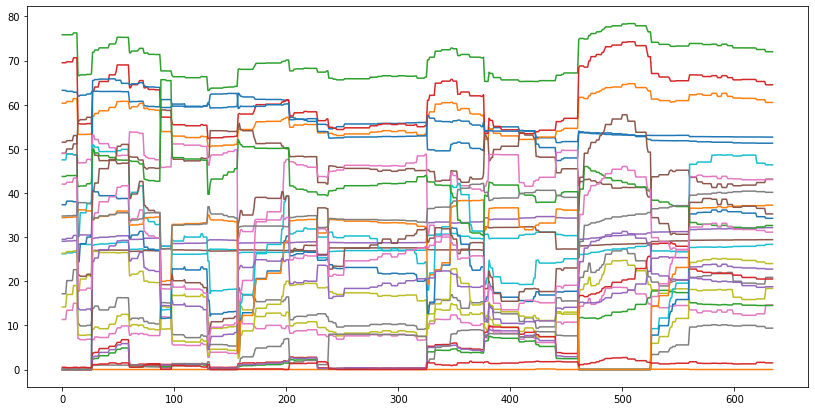

In [10]:
data.loc[:, 'env_rpi05_hum':'env_rpi15_temp'].plot(figsize=(14,7), legend=False)

### Estimates for baseline
The best estimates for baseline is the mean value, and the RMSE is the standard deviation.

In [11]:
y = data.iloc[:, :6]
mean = y.mean()
std = y.std(ddof=0)
rmse = (((y - mean)**2).mean())**0.5
output = pd.DataFrame([mean, std, rmse], index=["mean", "std(ddof=0)", "rmse"])
display(output)
print("Total Average = ", rmse.mean())

,sensor_point5_i_value,sensor_point6_i_value,sensor_point7_i_value,sensor_point8_i_value,sensor_point9_i_value,sensor_point10_i_value
mean,79.234646,92.929134,110.897638,80.311811,88.499213,92.125984
std(ddof=0),13.215240,28.059381,27.179263,24.831281,20.990315,17.558807
rmse,13.215240,28.059381,27.179263,24.831281,20.990315,17.558807


Total Average =  21.97238114491148


Let's check the heatmap

<AxesSubplot:>

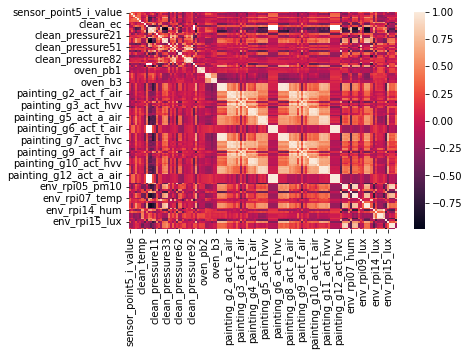

In [12]:
import seaborn as sns

sns.heatmap(data.corr())